In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # rf model
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression #lo model
from sklearn.tree import DecisionTreeClassifier # dt model
from sklearn.metrics import classification_report, accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


## Understanding Data

In [2]:
#read data file 
df =pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')

#check missing value & duplicated 
print(f'Missing value = {df.isnull().sum()}') # => missing value 

print(f' Duplicated = {df.duplicated().sum()}') # =>duplicated



Missing value = loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
 Duplicated = 0


In [3]:
#show shape 
df.shape


(4269, 13)

In [4]:
#columns name
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
#info (int ,float , category)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## Data Handling & EDA


In [6]:
#show same samples to know (Target columns , Nan value , outliers)
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [7]:
#show NULL value
data_null = round(df.isna().sum() / df.shape[0] * 100, 2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
loan_id,0.0
no_of_dependents,0.0
education,0.0
self_employed,0.0
income_annum,0.0
loan_amount,0.0
loan_term,0.0
cibil_score,0.0
residential_assets_value,0.0
commercial_assets_value,0.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


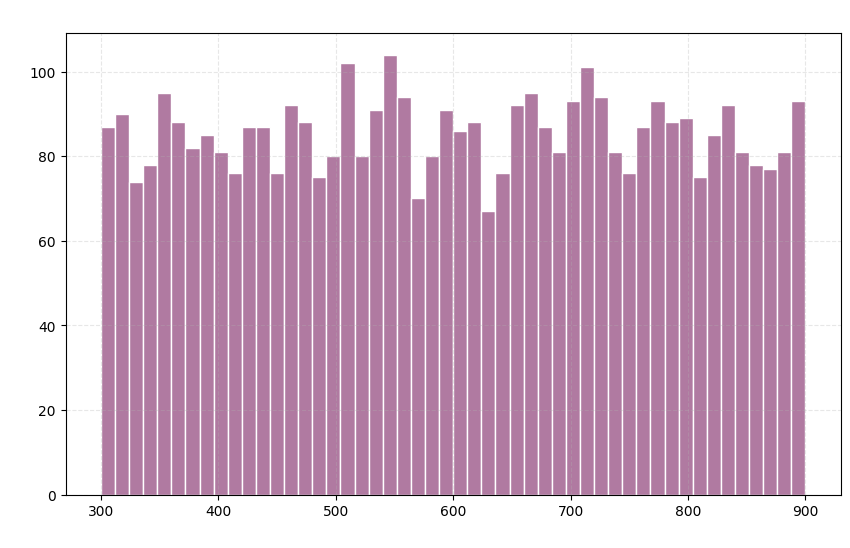

In [9]:
#show Distribution for Score 
plt.figure(figsize=(10, 6))
plt.hist(df[' cibil_score'], bins=50, color='#B07AA1', edgecolor='white')
plt.title(' cibil_score Distribution of Customers', fontsize=14, color='white')
plt.xlabel(' cibil_score', color='white')
plt.ylabel('Frequency', color='white')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

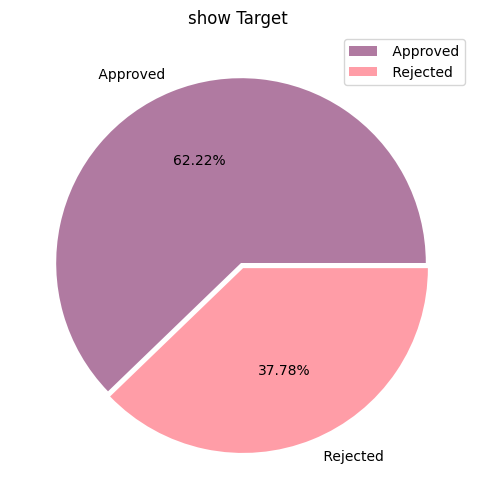

In [10]:
#show Target columns Analysis 
consistent_colors = [  '#B07AA1', '#FF9DA7']
plt.figure(figsize=(10,6))
explode = (0,0.03)
plt.pie(df[' loan_status'].value_counts().values,
        labels=df[' loan_status'].value_counts().index,
        colors=consistent_colors[:len(df[' loan_status'].value_counts())],
        explode=explode,
        autopct="%1.2f%%",
        )
plt.title('show Target ')
plt.legend()
plt.show()

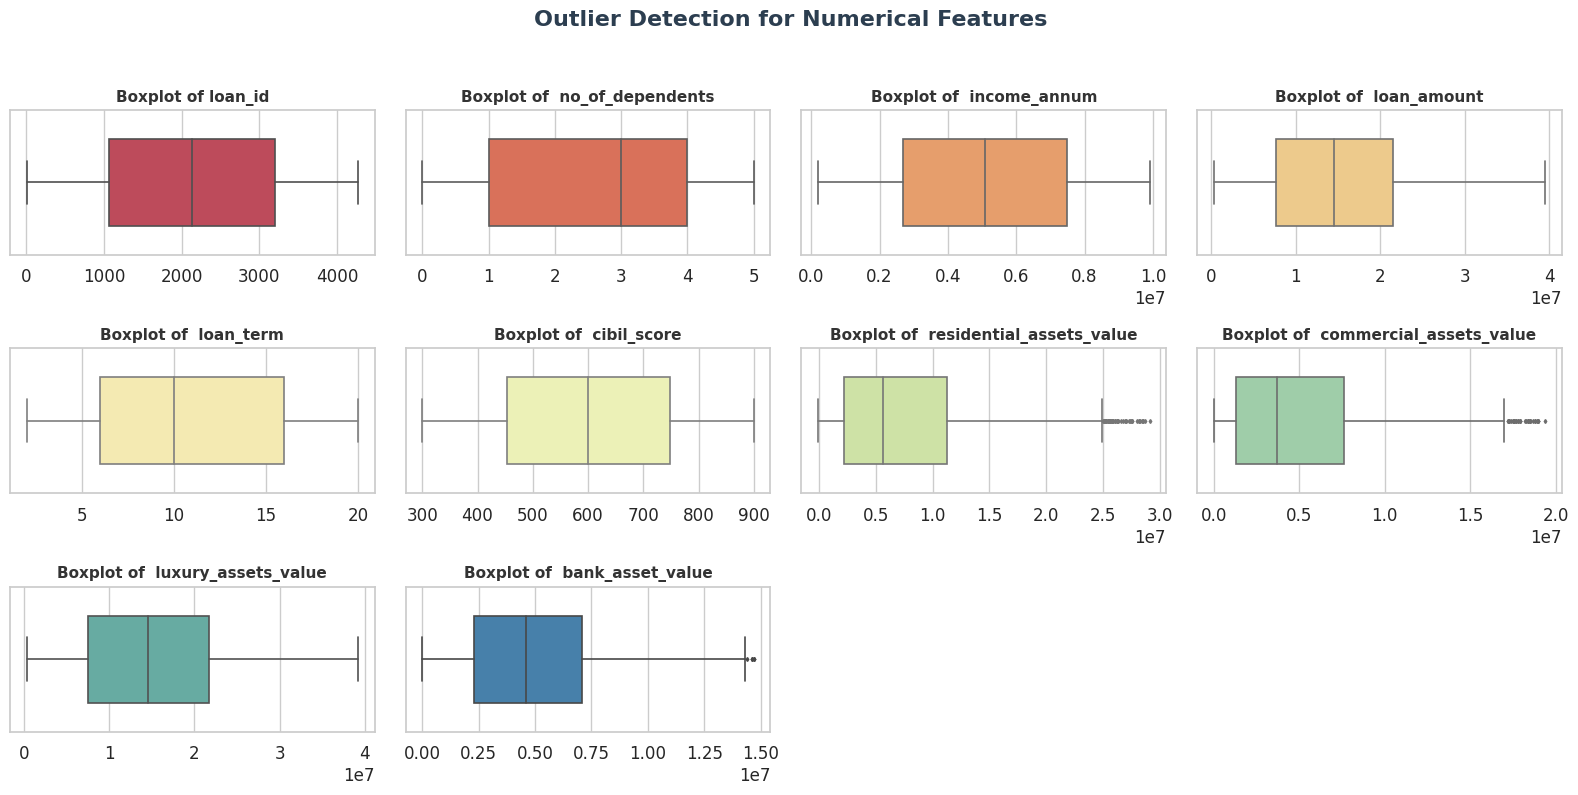

In [11]:
# Select numerical columns
numerical = df.select_dtypes(include=['int64', 'float64']).columns

# Set seaborn theme
sns.set(style="whitegrid", palette="Spectral", font_scale=1.1)

# Define color palette (vivid & unique)
palette = sns.color_palette("Spectral", len(numerical))

# Plot
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(
        x=df[col],
        color=palette[i-1],
        width=0.6,
        fliersize=2,  
        linewidth=1.2
    )
    plt.title(f"Boxplot of {col}", fontsize=11, fontweight="bold", color="#333333")
    plt.xlabel("")  
plt.suptitle("Outlier Detection for Numerical Features", fontsize=16, fontweight="bold", color="#2c3e50")
plt.tight_layout(rect=[0, 0, 1, 0.96])  # space for suptitle
plt.show()


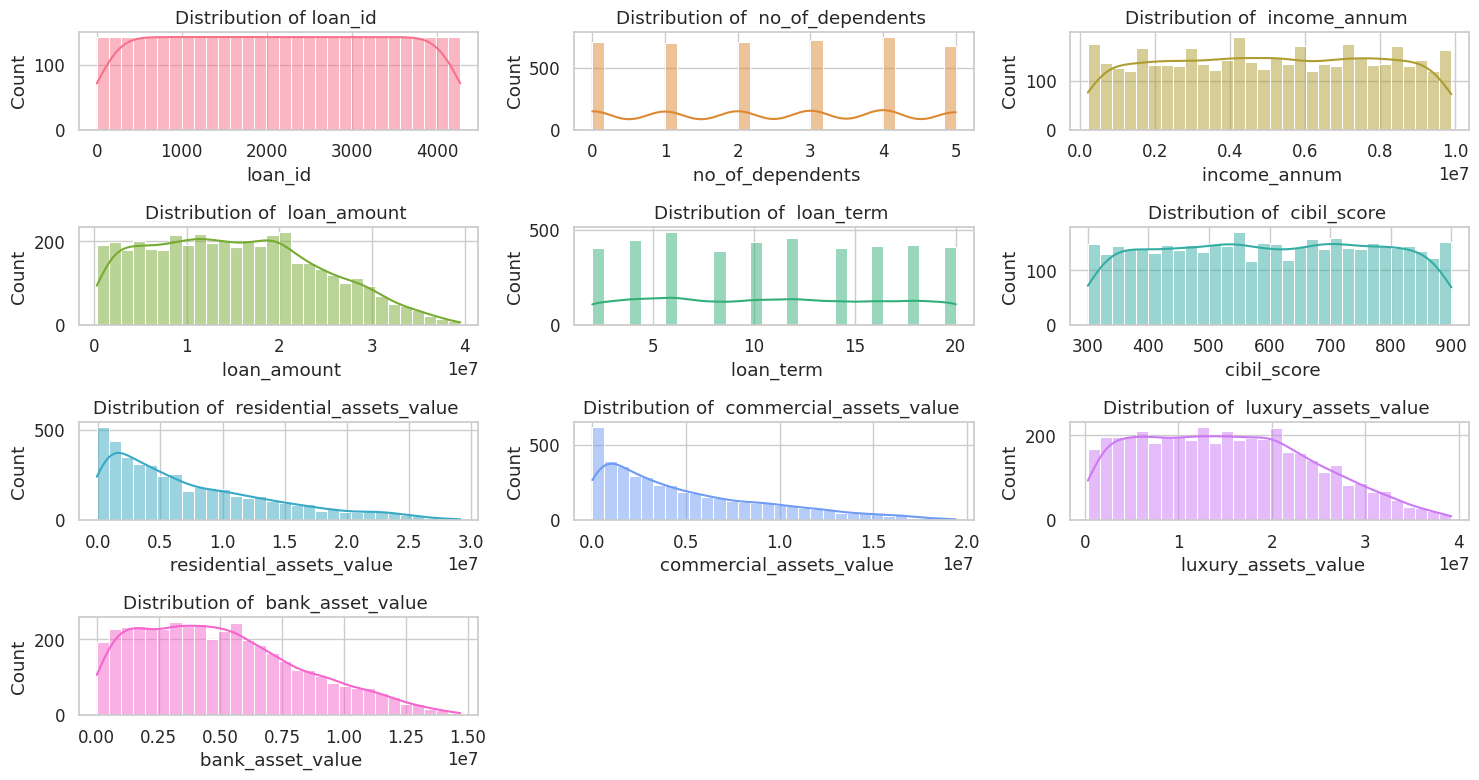

In [12]:
#show Distribution for all numerical columns 
palette =sns.color_palette("husl",len(numerical))

plt.figure(figsize=(15,8))

#for loop 
for i,col in enumerate(numerical,1):
    plt.subplot(4,3,i)
    sns.histplot(df[col],kde=True ,color=palette[i-1], bins=30)
    plt.title(f'Distribution of {col} ')

plt.tight_layout()
plt.show()


## Relation between Target column with Categorical columns

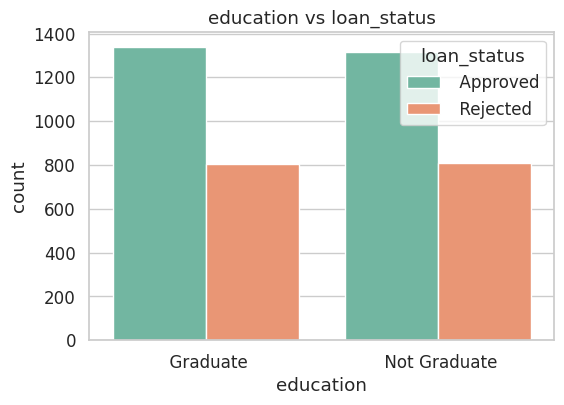

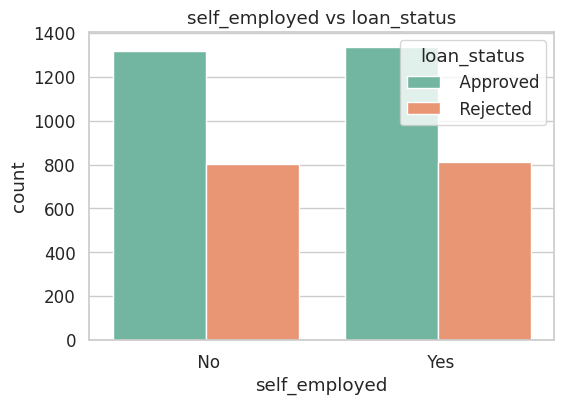

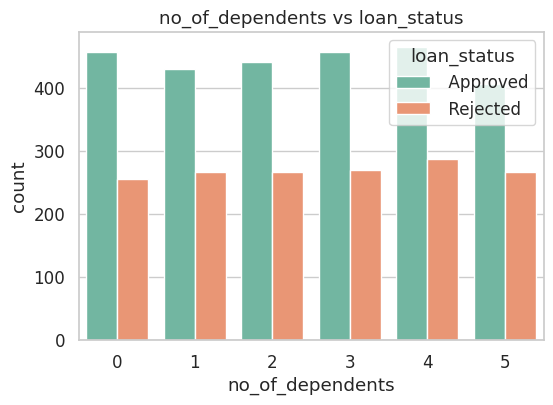

In [13]:
df.columns = df.columns.str.strip()

target = "loan_status"

# Categorical
categorical = ["education", "self_employed", "no_of_dependents"]
for col in categorical:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue=target, data=df, palette="Set2")
    plt.title(f"{col} vs {target}")
    plt.show()

## Relation between Target column with Numerical columns

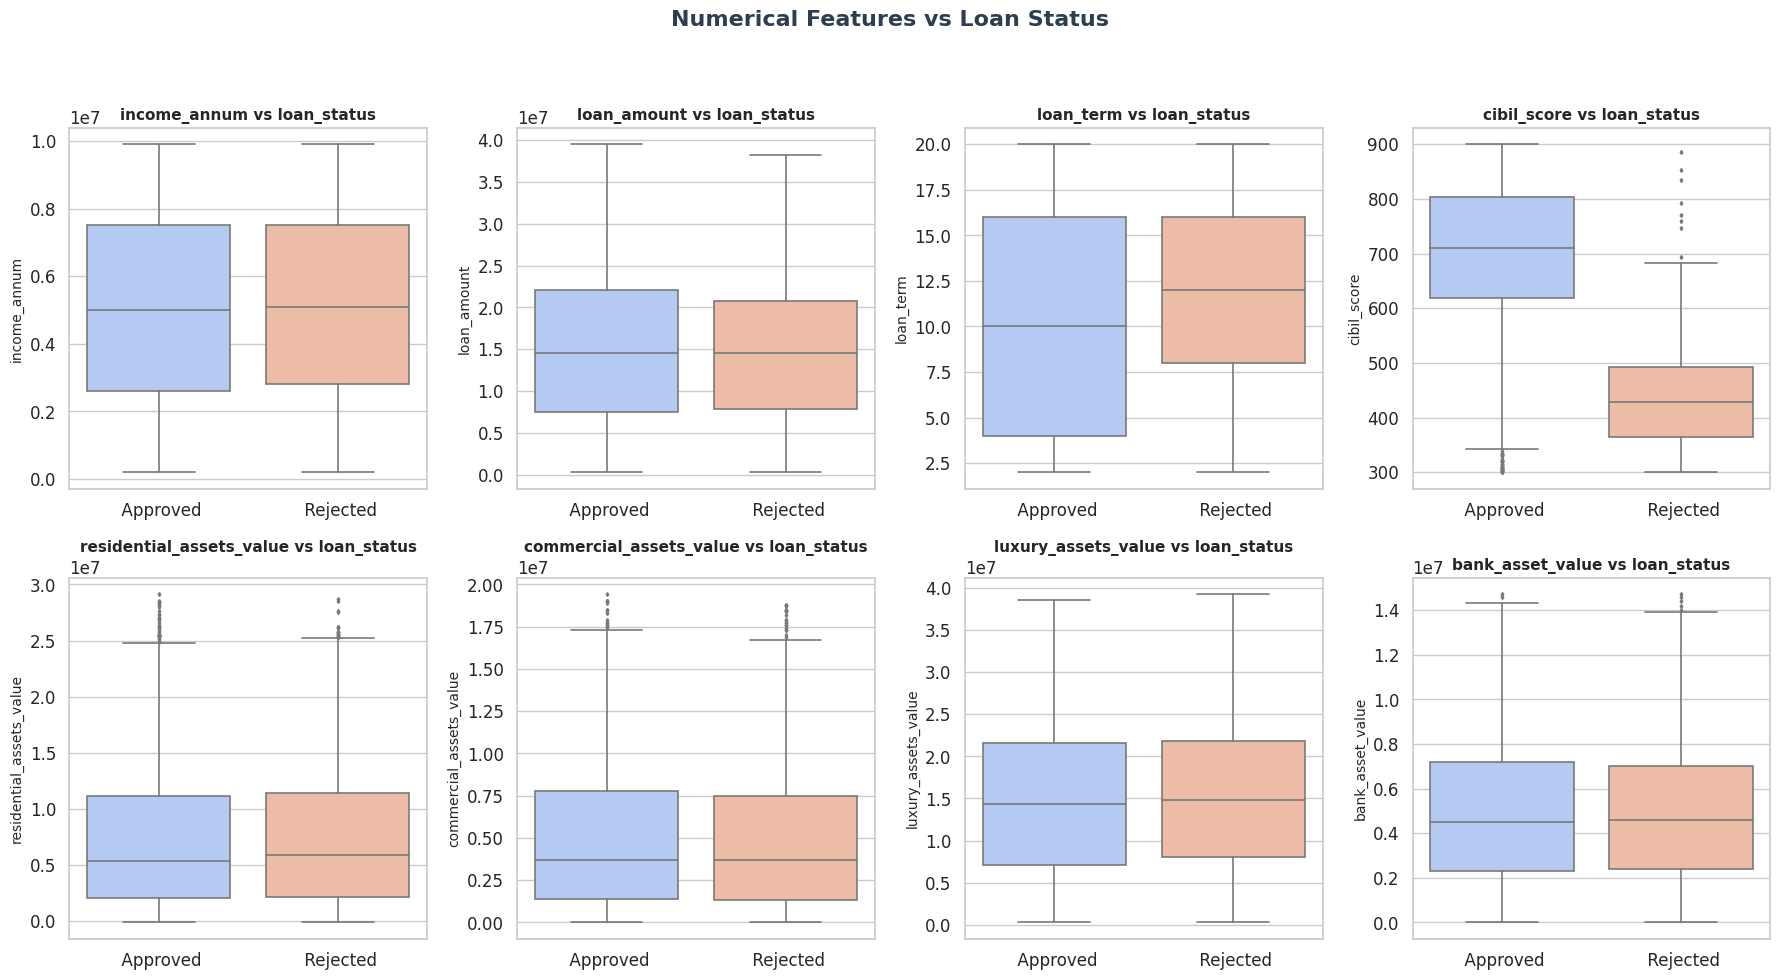

In [14]:
numerical = [
    "income_annum", "loan_amount", "loan_term", "cibil_score",
    "residential_assets_value", "commercial_assets_value",
    "luxury_assets_value", "bank_asset_value"
]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()  

for i, col in enumerate(numerical):
    sns.boxplot(
        data=df, 
        x=target, 
        y=col, 
        ax=axes[i], 
        palette="coolwarm",
        fliersize=2, 
        linewidth=1.2
    )
    axes[i].set_title(f"{col} vs {target}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")  
    axes[i].set_ylabel(col, fontsize=10)

plt.suptitle("Numerical Features vs Loan Status", fontsize=16, fontweight="bold", color="#2c3e50")
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

## Outliers processor

In [15]:
#remove outliers & Outliers processor before split data
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    
    df[column] = df[column].clip(lower, upper)
    return df


num_cols = ['no_of_dependents','income_annum','loan_amount','loan_term',
            'cibil_score','residential_assets_value',
            'commercial_assets_value','luxury_assets_value','bank_asset_value']

for col in num_cols:
    df = remove_outliers_iqr(df, col)

In [16]:
#delete unneeded column
df = df.drop(columns=['loan_id'])


## Encoding Categorical columns

In [17]:
# Encode to categorical
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])  # => target 


## split data to Train & Test

In [18]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3415, 11)
Test shape: (854, 11)


## Random Foresr model

In [19]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))




Accuracy: 0.9824355971896955
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       531
           1       0.99      0.96      0.98       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



## Class Imbalance

In [21]:
#from imblearn.over_sampling import SMOTE

# SMOTE
#sm = SMOTE(random_state=42)
#X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

#print("Before SMOTE:", y_train.value_counts().to_dict())
#print("After SMOTE:", y_resampled.value_counts().to_dict())


## logestic Regression model

In [22]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


=== Logistic Regression ===
Accuracy: 0.6229508196721312
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       531
           1       0.60      0.01      0.02       323

    accuracy                           0.62       854
   macro avg       0.61      0.50      0.39       854
weighted avg       0.61      0.62      0.48       854



## Decision Tree model

In [23]:
# Decision Tree
tree = DecisionTreeClassifier(max_depth=6, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [24]:
y_pred_tree = tree.predict(X_test)

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

=== Decision Tree ===
Accuracy: 0.9718969555035128
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       531
           1       0.99      0.93      0.96       323

    accuracy                           0.97       854
   macro avg       0.98      0.96      0.97       854
weighted avg       0.97      0.97      0.97       854



## In The End
Thank you for reading! 🙌 If you found this notebook helpful:

👉 Leave an upvote ❤ 👉 Fork it 🔁 to test your own models 👉 💬 I welcome your feedback and comments!

Together, let’s build more explainable AI!